In [130]:
import matplotlib.pyplot as plt
import numpy as np

## Краевые задачи

### Всякая всячина

Класс для отображения функций

In [131]:
class LabeledFunValue:
    def __init__(self, x, y, label):
        self.x = x
        self.y = y
        self.label = label

Функция выбора стилей графиков для n функций

In [132]:
def generate_line_styles(num_functions):
    line_styles = ['-', '--', '-.', ':']
    styles = []

    for i in range(num_functions):
        style = line_styles[i % len(line_styles)]
        styles.append(style)

    return styles

Функция визуализации функций 😄

In [133]:
def visualize_funs(title: str, *fun_value: LabeledFunValue):
    line_styles = generate_line_styles(len(fun_value))

    for i, fun in enumerate(fun_value):
        plt.plot(fun.x, fun.y, line_styles[i], label=fun.label)
        plt.xlabel('x')
        plt.ylabel('y(x)')
        plt.title(title)
        plt.grid(True)
        plt.legend()

    plt.show()

Метод прогонки

In [134]:
def thomas_algorithm(a, b, c, d):
    print(f'a = {a}')
    print(f'b = {b}')
    print(f'c = {c}')
    print(f'd = {d}')

    n = len(d)
    c_ = np.zeros(n)
    d_ = np.zeros(n)
    x = np.zeros(n)

    c_[0] = c[0] / b[0]
    d_[0] = d[0] / b[0]
    for i in range(1, n):
        denom = b[i] - a[i] * c_[i - 1]
        c_[i] = c[i] / denom if i < n - 1 else 0
        d_[i] = (d[i] - a[i] * d_[i - 1]) / denom

    x[-1] = d_[-1]
    for i in range(n - 2, -1, -1):
        x[i] = d_[i] - c_[i] * x[i + 1]

    return x

Тестируем функцию метода прогонки

In [135]:
def test_thomas():
    A = np.array([
        [2, 1, 0, 0],   # d0
        [1, 2, 1, 0],   # d1
        [0, 1, 2, 1],   # d2
        [0, 0, 1, 2]    # d3
    ])

    x_true = np.array([1, 2, 3, 4])
    b = A @ x_true  # матричное умножение

    b_main = np.diag(A)
    a = np.zeros_like(b_main)
    a[0] = 0
    a[1:] = np.diag(A, k=-1)
    c = np.zeros_like(b_main)
    c[-1] = 0
    c[:-1] = np.diag(A, k=1)
    d = b

    x_sol = thomas_algorithm(a, b_main, c, d)

    print("Истинное решение:", x_true)
    print("Решение методом Томаса:", x_sol)
    print("Ошибка:", np.linalg.norm(x_true - x_sol))

    assert np.allclose(x_true, x_sol, atol=1e-8), "Тест не пройден!"
    print("✅ Тест пройден успешно!")


test_thomas()

a = [0 1 1 1]
b = [2 2 2 2]
c = [1 1 1 0]
d = [ 4  8 12 11]
Истинное решение: [1 2 3 4]
Решение методом Томаса: [1. 2. 3. 4.]
Ошибка: 1.6011864169946884e-15
✅ Тест пройден успешно!


### Задание 1

In [136]:
'''
    y'' + p(x)y' + q(x)y = f(x);
    y(lb) = 0;
    y(rb) = 1;

    lb - левая граница по x
    rb - правая граница по x
'''


def solve_dirichlet(p, q, f, lb=0.0, rb=1.0, bb=0.0, tb=1.0, N=10):
    L = rb - lb
    h = L / N
    x = np.linspace(lb, rb, N + 1)

    a = np.zeros(N - 1)
    b = np.zeros(N - 1)
    c = np.zeros(N - 1)
    d = np.vectorize(f)(x)

    # [1; N)
    for i in range(1, N):
        xi = x[i]
        a[i - 1] = 1 / h ** 2 - p(xi) / (2 * h)
        b[i - 1] = -2 / h ** 2 + q(xi)
        c[i - 1] = 1 / h ** 2 + p(xi) / (2 * h)

        if i == 1:
            d[i - 1] -= a[i - 1] * lb
        if i == N - 1:
            d[i - 1] -= c[i - 1] * rb

    y_inner = thomas_algorithm(a, b, c, d[0:N - 1])

    # Собираем полный вектор y
    y = np.zeros(N + 1)
    y[0] = bb
    y[1:N] = y_inner
    y[N] = tb

    return x, y

Задаем условия задачи

In [137]:
p = lambda x: x
q = lambda x: -2
f = lambda x: 2
exact_fun = lambda x: x ** 2
lb = 0.0
rb = 1.0
bb = 0
tb = 1

a = [99.5 99.  98.5 98.  97.5 97.  96.5 96.  95.5]
b = [-202. -202. -202. -202. -202. -202. -202. -202. -202.]
c = [100.5 101.  101.5 102.  102.5 103.  103.5 104.  104.5]
d = [   2    2    2    2    2    2    2    2 -102]
x = 0.000, y ~ 0.000000
x = 0.100, y ~ 0.009586
x = 0.200, y ~ 0.039169
x = 0.300, y ~ 0.088743
x = 0.400, y ~ 0.158305
x = 0.500, y ~ 0.247851
x = 0.600, y ~ 0.357377
x = 0.700, y ~ 0.486879
x = 0.800, y ~ 0.636355
x = 0.900, y ~ 0.805802
x = 1.000, y ~ 1.000000


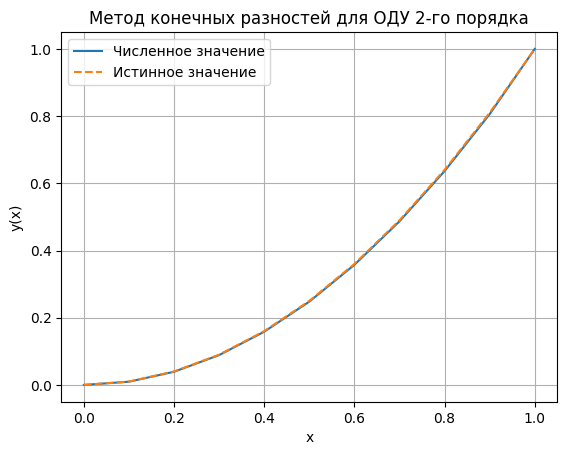

In [138]:
N = 10

x, y = solve_dirichlet(p, q, f, lb, rb, bb, tb, N)

for xi, yi in zip(x, y):
    print(f"x = {xi:.3f}, y ~ {yi:.6f}")

y_t = exact_fun(x)

visualize_funs('Метод конечных разностей для ОДУ 2-го порядка',
               LabeledFunValue(x, y, 'Численное значение'),
               LabeledFunValue(x, y_t, 'Истинное значение'))

### Задание 2

In [139]:
'''
    y''+p(x)y'+q(x)y = f(x);
    y'(lb) = bb;
    dp*y(rb) + dq*y'(rb) = tb;
'''


def solve_bvp(p, q, f, lb, rb, tb, bb, dp, dq, N=10):
    n = N + 1
    L = rb - lb
    h = L / N
    x = np.linspace(lb, rb, n)

    # Матрица и правая часть
    a = np.zeros(n)
    b = np.zeros(n)
    c = np.zeros(n)
    d = np.zeros(n)

    # y1 + (-1) * y0 = bb * h
    b[0] = -1.0     # левое краевое условие
    c[0] = 1.0
    d[0] = bb * h

    for i in range(1, N):
        xi = x[i]

        a[i] = 1 / h / h - p(xi) / 2 / h
        b[i] = q(xi) - 2 / h / h
        c[i] = 1 / h / h + p(xi) / 2 / h
        d[i] = f(xi)

    # (dp * h + dq) * yn + (-dq) * yn-1 = tb * h
    a[-1] = -dq     # правое краевое условие
    b[-1] = dp * h + dq
    d[-1] = tb * h

    # Решаем СЛАУ
    y = thomas_algorithm(a, b, c, d)

    return x, y

In [140]:
# p, q, f, lb, rb, tb, bb, dp, dq, N=10

p = lambda x: 0.8
q = lambda x: -x
f = lambda x: 1.4

lb = 1.8
rb = 2.1

tb = 1.7
bb = 0.5

dp = 2
dq = 1

In [141]:
# !!!
# p, q, f, lb, rb, tb, bb, dp, dq, N=10

p = lambda x: 2 * x
q = lambda _: -2
f = lambda _: 0.6

lb = 2.0
rb = 2.3

tb = 1
bb = 1

dp = 0.4
dq = -1

Отображаем на плоскости

a = [0.00000000e+00 1.04344444e+03 1.04244444e+03 1.04144444e+03
 1.04044444e+03 1.03944444e+03 1.03844444e+03 1.03744444e+03
 1.03644444e+03 1.03544444e+03 1.00000000e+00]
b = [-1.00000000e+00 -2.22422222e+03 -2.22422222e+03 -2.22422222e+03
 -2.22422222e+03 -2.22422222e+03 -2.22422222e+03 -2.22422222e+03
 -2.22422222e+03 -2.22422222e+03 -9.88000000e-01]
c = [1.00000000e+00 1.17877778e+03 1.17977778e+03 1.18077778e+03
 1.18177778e+03 1.18277778e+03 1.18377778e+03 1.18477778e+03
 1.18577778e+03 1.18677778e+03 0.00000000e+00]
d = [0.03 0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.03]
a = [0.00000000e+00 2.74434444e+04 2.74424444e+04 2.74414444e+04
 2.74404444e+04 2.74394444e+04 2.74384444e+04 2.74374444e+04
 2.74364444e+04 2.74354444e+04 2.74344444e+04 2.74334444e+04
 2.74324444e+04 2.74314444e+04 2.74304444e+04 2.74294444e+04
 2.74284444e+04 2.74274444e+04 2.74264444e+04 2.74254444e+04
 2.74244444e+04 2.74234444e+04 2.74224444e+04 2.74214444e+04
 2.74204444e+04 2.74194444e+04 2.741844

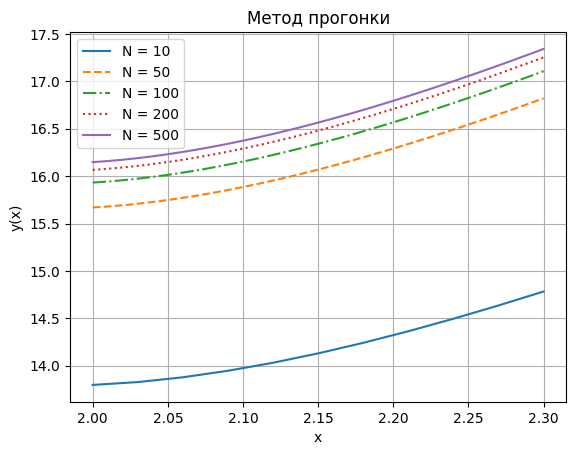

In [142]:
n_list = [10, 50, 100, 200, 500]
fun_list: list[LabeledFunValue] = []

for n in n_list:
    x, y = solve_bvp(p, q, f, lb, rb, tb, bb, dp, dq, n)

    fun_list.append(LabeledFunValue(x, y, f'N = {n}'))

visualize_funs('Метод прогонки', *fun_list)

### Задание 3

In [143]:
def differentiate(f, dx=1e-6):
    return lambda x: (f(x + dx) - f(x - dx)) / (2 * dx)

In [144]:
def gauss_integrate(func, a, b, n=5):
    xg, wg = np.polynomial.legendre.leggauss(n)
    x_mapped = 0.5 * (xg + 1) * (b - a) + a

    return 0.5 * (b - a) * np.sum(wg * func(x_mapped))

In [145]:
from scipy.integrate import quad

def solve_galerkin(x0, xn,
                   p, q, f,
                   bb, dp, dq, tb):
    A = bb
    B = (tb - dp * bb * xn - dq * bb) / dp

    # частное решение
    def y0(x):
        return A * x + B

    def dy0(x):
        return A

    # Проверка граничных условий для y0
    tol = 1e-8
    assert np.isclose(dy0(x0), bb, atol=tol), "y0'(x0) != bb"
    assert np.isclose(dp * y0(xn) + dq * dy0(xn), tb, atol=tol), "dp*y0(xn) + dq*y0'(xn) != tb"

    # 2) Базисные функции phi1, phi2, phi3
    # phi_i = (x - x0)**2 * (x - xn)**2 * P_i(x)
    phi = [
        lambda x: (x - x0) ** 2 * (x - xn) ** 2,
        lambda x: (x - x0) ** 2 * (x - xn) ** 2 * x,
        lambda x: (x - x0) ** 2 * (x - xn) ** 2 * x**2
    ]

    dphi = [differentiate(fn) for fn in phi]
    ddphi = [differentiate(fn) for fn in dphi]

    # Проверка граничных условий
    tol = 1e-8
    for i in range(len(phi)):
        assert np.isclose(dphi[i](x0), 0.0, atol=tol), f"Базисные функции не удовлетворяют граничным условиям"
        assert np.isclose(dp * phi[i](xn) + dq * dphi[i](xn), 0.0,
                          atol=tol), f"Базисные функции не удовлетворяют граничным условиям"

    # 3) Сборка матрицы и правой части
    n = len(phi)
    A_mat = np.zeros((n, n))
    L_vec = np.zeros(n)

    for i in range(n):
        for j in range(n):
            integrand_A = lambda x: (
                    ddphi[j](x) * phi[i](x) +
                    p(x) * dphi[j](x) * phi[i](x) +
                    q(x) * phi[j](x) * phi[i](x)
            )
            A_mat[i, j] = gauss_integrate(integrand_A, x0, xn)

        integrand_L = lambda x: (
                f(x) * phi[i](x) -
                (ddphi[i](x) * y0(x) + p(x) * dphi[i](x) * dy0(x) + q(x) * y0(x) * phi[i](x))
        )
        L_vec[i] = gauss_integrate(integrand_L, x0, xn)

    alpha = np.linalg.solve(A_mat, L_vec)

    def y_g(x):
        return y0(x) + sum(alpha[i] * phi[i](x) for i in range(n))

    return y_g, alpha

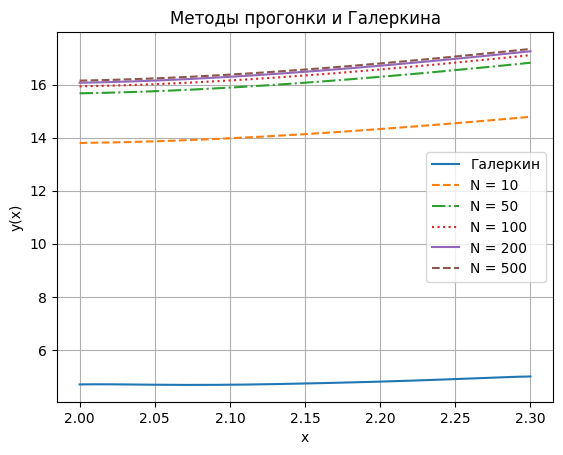

In [146]:
# Метод Галеркина
y_g, coeffs = solve_galerkin(
    x0=lb, xn=rb,
    p=p, q=q, f=f,
    bb=bb, dp=dp, dq=dq, tb=tb
)
x_g = np.linspace(lb, rb, 1000)

y_val_g = y_g(x_g)

# отображаем Галеркина и метод прогонки из задания 2
visualize_funs('Методы прогонки и Галеркина',
               LabeledFunValue(x_g, y_val_g, 'Галеркин'),
               *fun_list)
